# Защита персональных данных клиентов

Вам нужно защитить данные клиентов страховой компании «Хоть потоп». Разработайте такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. Обоснуйте корректность его работы.

Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось. Подбирать наилучшую модель не требуется.

## Загрузка данных

In [1]:
#загрузим библиотеки Pandas и NumPy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#Из библиотеки scikit-learn загрузим необходимое для построения линейной регрессии
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [2]:
#откроем файл с данными страхования
try:
    data_insurance = pd.read_csv('insurance.csv')
except:
    data_insurance = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')

Посмотрим на общие данные в файле

In [3]:
data_insurance.info()
data_insurance.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


Посчитаем количество дубликатов и в случае обнаружения - удалим их

In [4]:
data_insurance.duplicated().sum()

153

In [5]:
data_insurance.drop_duplicates(inplace=True)

Посмотрим на пропуски

In [6]:
data_insurance.isnull().sum()

Пол                  0
Возраст              0
Зарплата             0
Члены семьи          0
Страховые выплаты    0
dtype: int64

Посмотрим на очищенные данные

In [7]:
data_insurance.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,4847.000000,4847.000000,4847.000000,4847.000000,4847.000000
mean,0.498453,31.023932,39895.811842,1.203425,0.152259
std,0.500049,8.487995,9972.953985,1.098664,0.468934
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33200.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


Можно заметить отсутствие дисбаланса по полу, а также слабые отличия средних и медианных значений возраста и зарплаты 

Опишем взаимосвязь и построим матрицу диаграмм рассеяния для всех параметров в данных.

In [8]:
data_insurance.corr()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.000000,0.001953,0.015456,-0.007315,0.011565
Возраст,0.001953,1.000000,-0.017386,-0.009064,0.654964
Зарплата,0.015456,-0.017386,1.000000,-0.031687,-0.013123
Члены семьи,-0.007315,-0.009064,-0.031687,1.000000,-0.039303
Страховые выплаты,0.011565,0.654964,-0.013123,-0.039303,1.000000


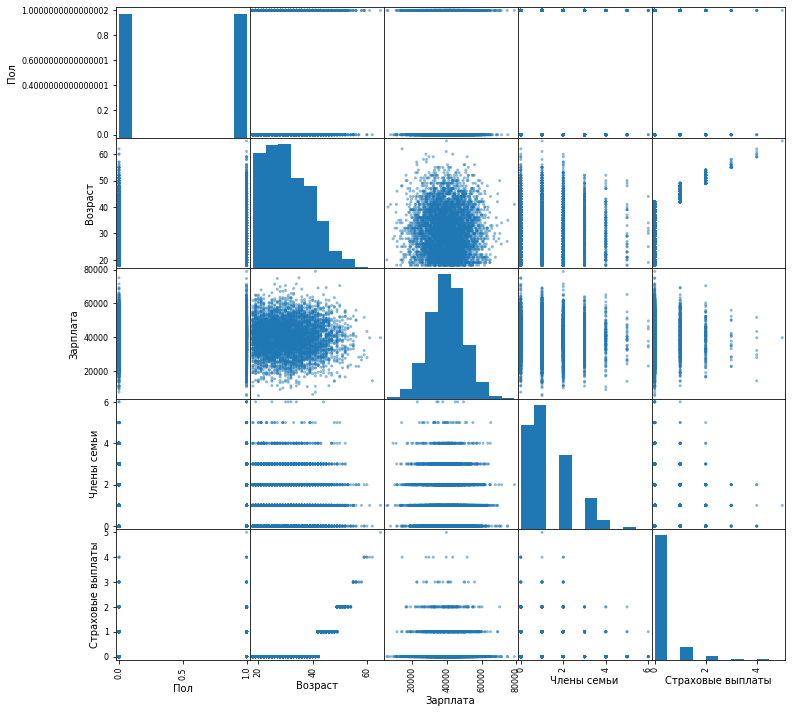

In [9]:
pd.plotting.scatter_matrix(data_insurance, figsize=(12, 12));

Можно заметить, что между признаками, кроме страховых выплат, отсутствует корреляция. 

На страховые выплаты же наиболее сильно влияет возраст.

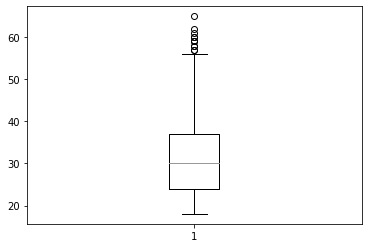

In [10]:
plt.boxplot(data_insurance['Возраст']);

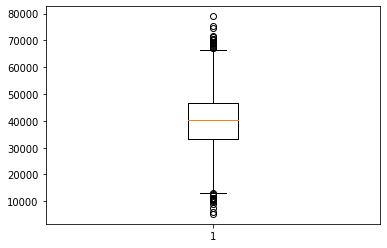

In [11]:
plt.boxplot(data_insurance['Зарплата']);

Выбросов немного и по зарплате и по возрасту немного

## Умножение матриц

В этом задании вы можете записывать формулы в *Jupyter Notebook.*

Чтобы записать формулу внутри текста, окружите её символами доллара \\$; если снаружи —  двойными символами \\$\\$. Эти формулы записываются на языке вёрстки *LaTeX.* 

Для примера мы записали формулы линейной регрессии. Можете их скопировать и отредактировать, чтобы решить задачу.

Работать в *LaTeX* необязательно.

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** 
При умножении на обратимую матрицу, качество линейной регресии не изменится.

**Обоснование:** 

- Представим новую матрицу признаков $X1$ как произведение старой на обратимую матрицу $P$:

$$X1 = X P$$

- Подставим новое значение $X1$ в формулу обучения:

$$w1 = ((X P)^T X P)^{-1} (X P)^T y$$

- Раскроем первое произведение $(X P)^T$:

$$w1 = (P^T X^T X P)^{-1} P^T X^T y$$

- Множители в скобках привпедём к виду произведения трех множителей:

$$w1 = (P^T (X^T X) P)^{-1} P^T X^T y$$

- Раскроем скобки $(P^T (X^T X) P)^{-1}$:

$$w1 = P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y$$

- По условию $P$ обратимая, а значит произведение матрицы $(P^T)^{-1} P^T$ на обратную равно единичной матрице $E$:


$$w1 = P^{-1} (X^T X)^{-1} E X^T y = P^{-1} (X^T X)^{-1} X^T y$$


- Получилась формула для $w1$:

$$w1 = P^{-1} (X^T X)^{-1} X^T y = P^{-1} w$$

- Подставим новое значение весов 𝑤1 в формулу для предсказаний линейной регрессии:

$$a1 = X1w1 = XPP^{-1} w$$

- По условию обратимая, значит произведение снова равно:

$$a1 = XPP^{-1} w = X E w = X w = a$$

Следовательно, предсказания для матрицы признаков, умноженных на обратимую матрицу равны исходным предсказаниям.

Таким образом, при умножении признаков $X$ на обратимую матрицу $P$ - качество линейной регрессии не изменится. В данном случае, параметры линейной регрессии в исходной задаче $w$ и в преобразованной $w1$ связаны следующим образом:

$$w1 = P^{-1} w$$

## Алгоритм преобразования

**Алгоритм**

Для защиты информации на этапе поиска коэффициентов регрессии и предсказаний регрессии будем умножать матрицу признаков на обратимую матрицу, которая будет генерироваться случайным образом.

1. Создать случайную квадратную матрицу размерности $n x n$, $n$ - число признаков регрессии.
2. Проверить полученную матрицу на обратимость.
3. Получить преобразованные матрицы признаков на выборках путём умножения исходных признаков на одну и ту же обратную случайную квадратную матрицу
4. Найти метрики модели на исходных и преобразованных признаках.
5. Сравнить метрики между собой. 

**Обоснование**

Как было показано ранее: при умножении признаков на обратимую матрицу, качество линейной регрессии не изменится, значит мы можем записать данные в виде результата произведения признаков и обратимой матрицы.

Матрица должна иметь размерность $n x n$, где $n$ - количество признаков для регрессии. Таким образом матрица имеет ту же размерность, что и обратная матрица. Обратная же матрица существует только для квадратных невырожденных матриц (определитель которых не равен нулю).

## Проверка алгоритма

Выделим выплаты в качестве целевого признака для линейной регрессии

In [12]:
insurance_features = data_insurance.drop('Страховые выплаты', axis=1)
insurance_target = data_insurance['Страховые выплаты']
RANDOM_STATE=12345

Разобьем датасет на обучающую (75%) и тестовую выборки (25%).

In [13]:
insurance_features_train, insurance_features_test, insurance_target_train, insurance_target_test = train_test_split(
    insurance_features, insurance_target, test_size=0.25, random_state=RANDOM_STATE)

insurance_list = [insurance_features_train, insurance_features_test, insurance_target_train, insurance_target_test]
for i in insurance_list:
    display(i.shape)

(3635, 4)

(1212, 4)

(3635,)

(1212,)

Сгенерируем случайную квадратную матрицу размерности числа признаков линейной регрессии, обратим её и помножим признаки обучающей и тестовой выборок на полученную матрицу

In [16]:
random_matrix = np.random.normal(size=(insurance_features.shape[1], insurance_features.shape[1]))
inverse_random_matrix = np.linalg.inv(random_matrix)
pd.DataFrame(inverse_random_matrix @ random_matrix)

,0,1,2,3
0,1.000000e+00,1.028738e-15,-1.197049e-16,-2.719414e-16
1,-7.124591e-16,1.000000e+00,1.095663e-16,4.251963e-16
2,-3.601914e-15,-6.445587e-15,1.000000e+00,1.444767e-15
3,8.165486e-16,1.494251e-16,1.445213e-17,1.000000e+00


In [17]:
pd.DataFrame(random_matrix @ inverse_random_matrix)

,0,1,2,3
0,1.000000e+00,-1.285054e-16,-8.776620e-16,-1.639511e-15
1,1.948388e-16,1.000000e+00,3.439412e-16,-3.449972e-15
2,1.593168e-17,-4.187119e-16,1.000000e+00,-1.065729e-15
3,1.237202e-16,-1.579370e-16,9.263571e-17,1.000000e+00


In [18]:
randomized_features_train = insurance_features_train @ inverse_random_matrix
randomized_features_test = insurance_features_test @ inverse_random_matrix

display(randomized_features_train.shape)
display(randomized_features_test.shape)

(3635, 4)

(1212, 4)

In [19]:
def linear_r2_calculator(df_features_train, df_features_test):
    scaler = StandardScaler()
    scaler.fit(df_features_train)
    df_features_train = scaler.transform(df_features_train)
    df_features_test = scaler.transform(df_features_test)
    pd.options.mode.chained_assignment=None
    model = LinearRegression()
    model.fit(df_features_train, insurance_target_train)
    df_predictions = model.predict(df_features_test)
    df_r2 = r2_score(insurance_target_test, df_predictions)
    return df_r2

In [20]:
insurance_r2 = linear_r2_calculator(insurance_features_train, insurance_features_test)
randomized_r2 = linear_r2_calculator(randomized_features_train, randomized_features_test)

In [21]:
print('R2 на исходных признаках =', round(insurance_r2, 4))
print('R2 на преобразованных признаках =', round(randomized_r2, 4))
print('R2 до и после преобразований отличаются на', insurance_r2 - randomized_r2)

R2 на исходных признаках = 0.4231
R2 на преобразованных признаках = 0.4231
R2 до и после преобразований отличаются на 8.533174167268953e-13


# Вывод
- Данные по страхованию загружены и предварительно обработаны, выбросов по данным нет.
- Написан и описан алгоритм преобразования исходных данных, чтобы по ним было сложно восстановить персональную информацию, без ухудшения качества моделей машинного обучения
- Проверка пройдена успешно, качество модели до преобразований и после - не отличается. Метод умножения признаков на обратимую матрицу для защиты данных пользователей проверен, разработан и протестирован алгоритм.